# Task 2: Credit Risk Prediction

## Objective
Predict whether a loan applicant is likely to default on a loan.

## Dataset
**Loan Prediction Dataset (available on Kaggle)**

## Instructions
- Handle missing data appropriately.
- Visualize key features such as loan amount, education, and income.
- Train a classification model like Logistic Regression or Decision Tree.
- Evaluate the model using accuracy and a confusion matrix.

## Skills
- Data cleaning and handling missing values
- Exploratory Data Analysis (EDA)
- Binary classification using machine learning
- Model evaluation using confusion matrix and accuracy
cy
 

#### Step 1: Import the required libraries

In [21]:
!pip install kaggle

In [22]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


#### Step 2: Downloading and Extracting Dataset from Kaggle

In [23]:
os.environ['KAGGLE_CONFIG_DIR'] = "C:/Users/Honest/.kaggle/kaggle.json"

In [24]:
!kaggle datasets download -d altruistdelhite04/loan-prediction-problem-dataset

Dataset URL: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset
License(s): unknown
loan-prediction-problem-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [25]:
print(os.listdir())

['.anaconda', '.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.jupyter', '.kaggle', '.matplotlib', '.VirtualBox', '.zenmap', '3D Objects', 'anaconda3', 'AppData', 'Application Data', 'best_churn_model.pkl', 'churn-modelling', 'churn-modellingcsv.zip', 'cleaned_data_housing.csv', 'coffee.csv', 'Contacts', 'Cookies', 'Customer_Churn_Prediction(Bank Customers).ipynb', 'Data', 'Desktop', 'Documents', 'Downloads', 'Favorites', 'housing.csv', 'IntelGraphicsProfiles', 'iris.csv', 'iris_dataset.ipynb', 'Links', 'loan-prediction-problem-dataset.zip', 'loan_prediction_dataset', 'loan_prediction_dataset.ipynb', 'Local Settings', 'Microsoft', 'MicrosoftEdgeBackups', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{fd9a35db-49fe-11e9-aa2c-248a07783950}.TM.blf', 'NTUSER.DAT{fd9a35db-49fe-11e9-aa2c-248a07783950}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{fd9a35db-49fe-11e9-aa2c-248a07783950}.TMContainer0000000000

In [26]:
with zipfile.ZipFile("loan-prediction-problem-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("loan_prediction_dataset")

print("Extracted Files:", os.listdir("loan_prediction_dataset"))


Extracted Files: ['.ipynb_checkpoints', 'test_Y3wMUE5_7gLdaTN.csv', 'train_u6lujuX_CVtuZ9i.csv']


#### Step 3: Read the dataset

In [27]:
df = pd.read_csv("loan_prediction_dataset/train_u6lujuX_CVtuZ9i.csv")

#### Step 4: Inspect the dataset structure 

In [28]:
# Check the shape (rows, columns)
print("Shape of dataset:", df.shape)

Shape of dataset: (614, 13)


In [29]:
# Display column names
print("Column names:", df.columns)

Column names: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [30]:
# Display first 5 rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [31]:
# Display last 5 rows 
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [32]:
# Shows column types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [33]:
# Shows how many missing values in each column
df.isnull().sum()  

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
# summary statistics for numerical columns
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [35]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col} : {df[col].unique()}")  # Unique values per categorical column


Loan_ID : ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP0012

#### Step 5:  Data cleaning and handling missing values 

In [122]:
# Fill categorical missing values with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [123]:
# Fill numerical missing values with median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())


In [124]:
# Convert '3+' to 3 in Dependents
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

In [125]:
# Drop Loan_ID (not useful for prediction)
df.drop('Loan_ID', axis=1, inplace=True)

In [126]:
# verify missing values are fixed
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Step 6: Exploratory Data Analysis (EDA) 

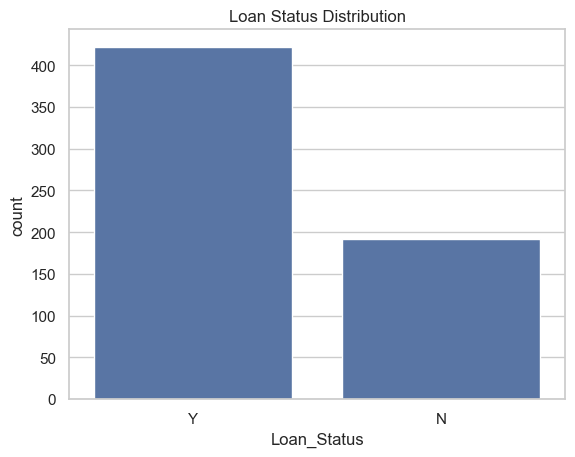

In [127]:
# Distribution of Loan Status 
sns.countplot(data=df, x='Loan_Status')
plt.title("Loan Status Distribution")
plt.show()


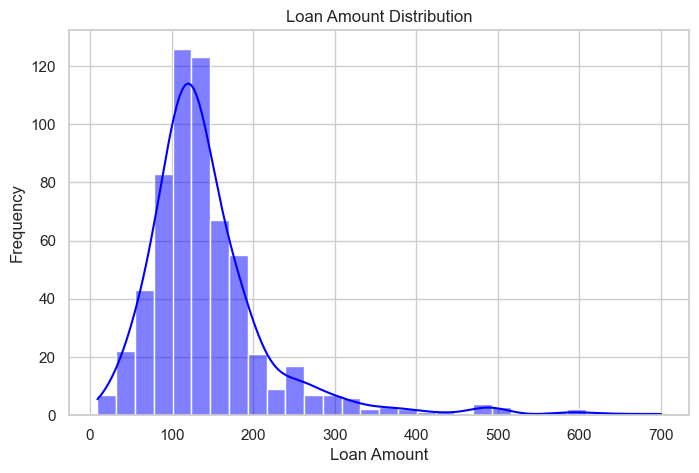

In [128]:
# Loan Amount Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['LoanAmount'], bins=30, kde=True, color='blue')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

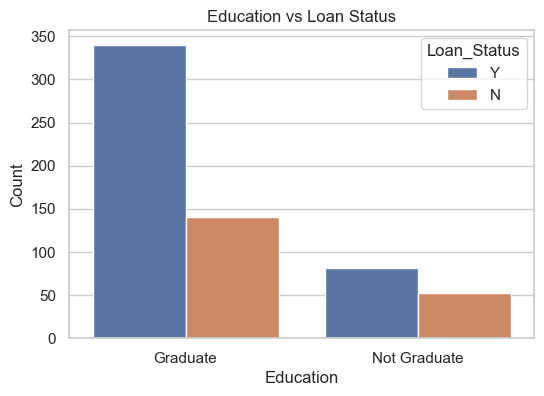

In [129]:
# Education vs Loan Status
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Education', hue='Loan_Status')
plt.title('Education vs Loan Status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

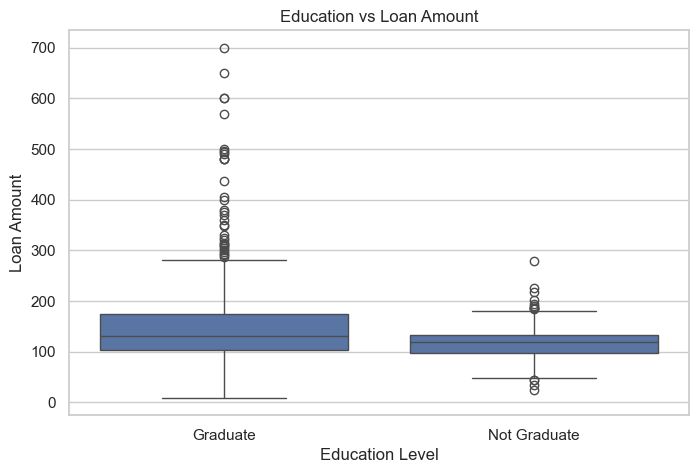

In [130]:
# Education vs Loan Amount
plt.figure(figsize=(8,5))
sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.title('Education vs Loan Amount')
plt.xlabel('Education Level')
plt.ylabel('Loan Amount')
plt.show()


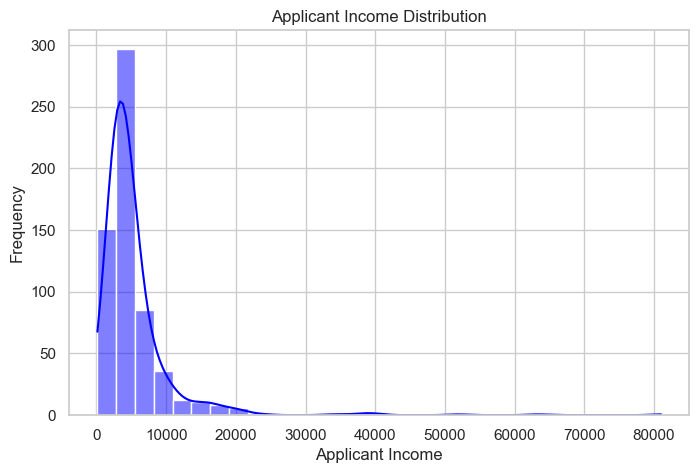

In [131]:
#  Applicant Income Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['ApplicantIncome'], bins=30, kde=True, color='BLUE')
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

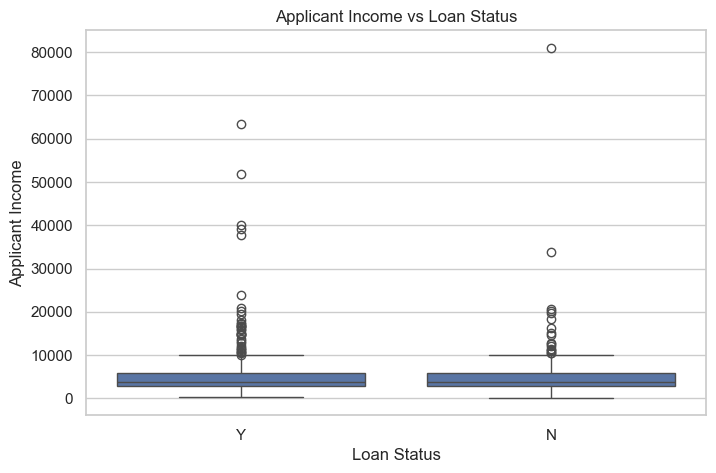

In [132]:
# Applicant Income vs Loan Status
plt.figure(figsize=(8,5))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Applicant Income vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

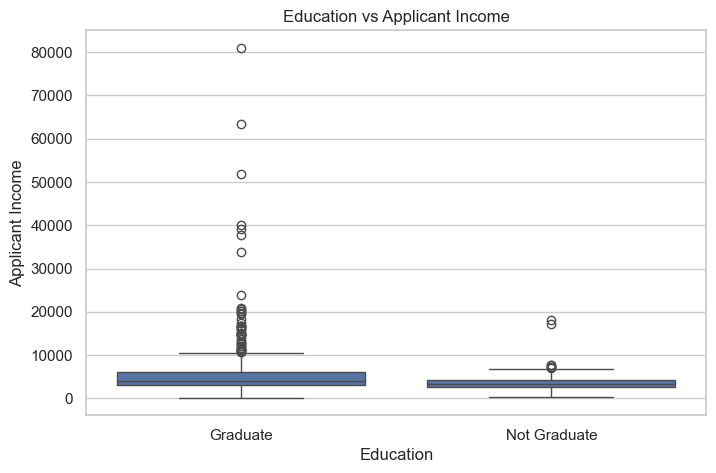

In [133]:
# Education vs Applicant Income
plt.figure(figsize=(8,5))
sns.boxplot(x='Education', y='ApplicantIncome', data=df)
plt.title('Education vs Applicant Income')
plt.xlabel('Education')
plt.ylabel('Applicant Income')
plt.show()

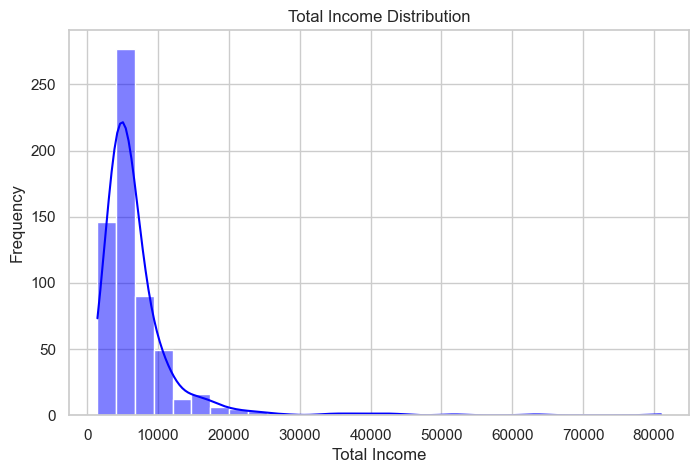

In [134]:
# Total Income distribution (Applicant + Coapplicant)
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
plt.figure(figsize=(8,5))
sns.histplot(df['Total_Income'], bins=30, kde=True, color='blue')
plt.title('Total Income Distribution')
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.show()

#### Step 7: Encode Categorical Variables

In [135]:
# Copy dataframe to avoid overwriting
df_model = df.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical features
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for col in categorical_cols:
    df_model[col] = le.fit_transform(df_model[col])

# Verify encoding
df_model.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0


#### Step 8: Split Data into Features and Target

In [136]:
# Features (X) and target (y)
X = df_model.drop('Loan_Status', axis=1)
y = df_model['Loan_Status']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Step 9: Train Logistic Regression Model

In [137]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_log = log_model.predict(X_test_scaled)

# Evaluate
print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


🔹 Logistic Regression
Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



#### Step 10: Train Decision Tree Model

In [139]:
# Train model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predict on test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate
print("🔹 Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

🔹 Decision Tree
Accuracy: 0.6991869918699187
Confusion Matrix:
 [[22 21]
 [16 64]]
              precision    recall  f1-score   support

           0       0.58      0.51      0.54        43
           1       0.75      0.80      0.78        80

    accuracy                           0.70       123
   macro avg       0.67      0.66      0.66       123
weighted avg       0.69      0.70      0.69       123



#### Step 11: Compare Accuracy

In [141]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

Logistic Regression Accuracy: 0.7886178861788617
Decision Tree Accuracy: 0.6991869918699187


#### Step 12: Comparison of Model Performance

In [144]:
# =========================================================
# Model Comparison Summary:
#
# 1. Logistic Regression achieves higher overall accuracy (78.86%) 
#    compared to Decision Tree (69.92%).
# 2. Logistic Regression predicts approved loans (class 1) very well 
#    with high recall (0.99) and F1-score (0.86), but has lower recall 
#    for defaults (class 0 = 0.42).
# 3. Decision Tree predicts defaults slightly better (recall 0.51) 
#    but misses more approvals, leading to lower overall accuracy 
#    and F1-scores.
# 4. Overall, Logistic Regression is the better model for this dataset, 
#    while Decision Tree shows a more balanced but weaker performance.
# =========================================================
